In [1]:
import numpy as np
import pandas as pd

df  = pd.read_csv('winequalityN.csv')

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [7]:
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]

In [8]:
df.drop('type', axis = 1, inplace=True)

In [10]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [11]:
df['is_good_wine'] = [1 if quality >=6 else 0 for quality in df['quality']]

In [12]:
df.drop('quality', axis = 1, inplace = True)

# Training set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('is_good_wine', axis =1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
X_train.shape,X_test.shape

((5170, 12), (1293, 12))

In [17]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine
459,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000,1
1460,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000,1
4403,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,1
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000,1
4317,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000,1


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
import tensorflow as tf
tf.random.set_seed(42)

# Optimize Learning Rate

In [53]:
1e-3 *10 ** (1/30)

0.0010797751623277097

In [54]:
1e-3 *10 ** (100/30)

2.1544346900318847

In [55]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [60]:
initial_model.compile(
    loss = tf.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = tf.keras.metrics.BinaryAccuracy(name='accuracy')
)

In [65]:
initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10 **(epoch/30))
    ]
)

Epoch 1/100
162/162 [==============================] - 0s 956us/step - loss: 0.4221 - accuracy: 0.7880 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 0s 972us/step - loss: 0.4011 - accuracy: 0.8023 - lr: 0.0011
Epoch 3/100
162/162 [==============================] - 0s 951us/step - loss: 0.3847 - accuracy: 0.8143 - lr: 0.0012
Epoch 4/100
162/162 [==============================] - 0s 932us/step - loss: 0.3712 - accuracy: 0.8267 - lr: 0.0013
Epoch 5/100
162/162 [==============================] - 0s 935us/step - loss: 0.3606 - accuracy: 0.8360 - lr: 0.0014
Epoch 6/100
162/162 [==============================] - 0s 957us/step - loss: 0.3502 - accuracy: 0.8404 - lr: 0.0015
Epoch 7/100
162/162 [==============================] - 0s 949us/step - loss: 0.3422 - accuracy: 0.8458 - lr: 0.0016
Epoch 8/100
162/162 [==============================] - 0s 954us/step - loss: 0.3359 - accuracy: 0.8497 - lr: 0.0017
Epoch 9/100
162/162 [==============================] - 0s 975us/step - l

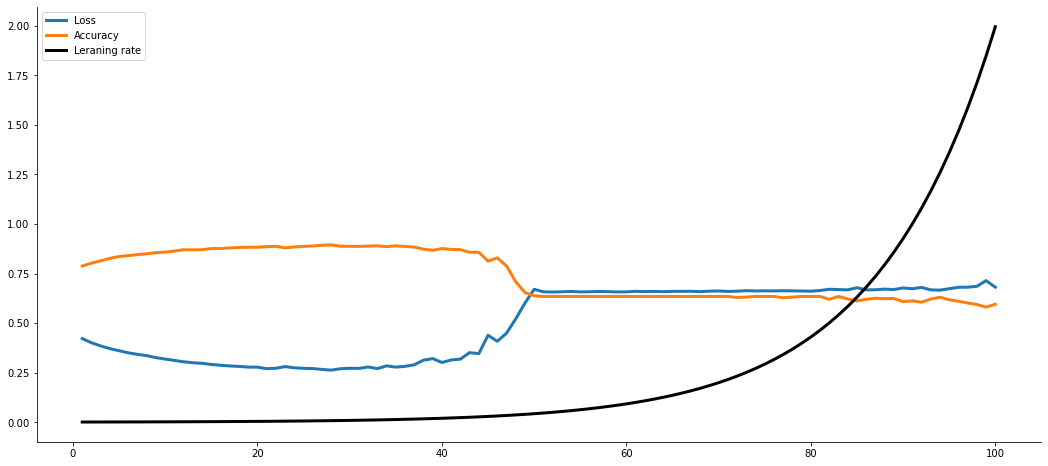

In [66]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 101), initial_history.history['loss'], label = 'Loss', lw=3)
plt.plot(np.arange(1, 101), initial_history.history['accuracy'], label = 'Accuracy', lw=3)
plt.plot(np.arange(1, 101), initial_history.history['lr'], label = 'Leraning rate', lw=3, color="#000")
plt.legend()

0.26285699009895325


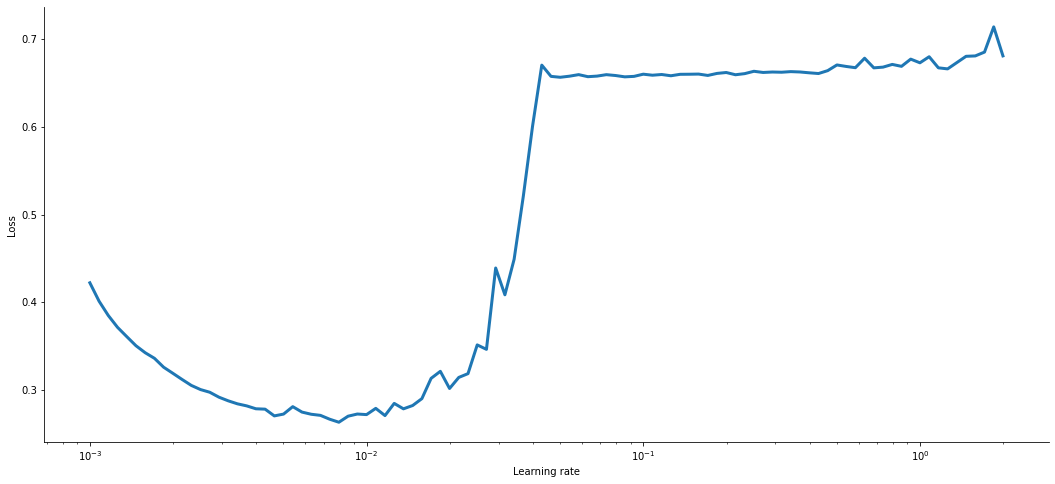

In [77]:
learning_rates = 1e-3 * (10 **(np.arange(100)/ 30))
plt.figure(figsize = (18,8))
plt.semilogx(learning_rates, initial_history.history['loss'], lw=3)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
print(min(initial_history.history['loss']))

# Optimal neural network architecture

In [20]:
num_layers= 3
min_nodes_per_layer = 64
max_nodes_per_layer = 256
node_step_size = 64

In [21]:
node_options = list(range(
    min_nodes_per_layer,
    max_nodes_per_layer+1,
    node_step_size
))
node_options

[64, 128, 192, 256]

In [24]:
two_layer_possibilities = [node_options, node_options]

In [25]:
import itertools
list(itertools.product(*two_layer_possibilities))

[(64, 64),
 (64, 128),
 (64, 192),
 (64, 256),
 (128, 64),
 (128, 128),
 (128, 192),
 (128, 256),
 (192, 64),
 (192, 128),
 (192, 192),
 (192, 256),
 (256, 64),
 (256, 128),
 (256, 192),
 (256, 256)]

In [26]:
layer_possibilities = [node_options] * num_layers

In [27]:
layer_node_permutations = list(itertools.product(*layer_possibilities))

In [28]:
models = []
for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(12,)))
    model_name = ''
    
    for nodes_at_layers in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layers, activation ='relu'))
        model_name += f'dense{nodes_at_layers}_'
        
    model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [29]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


## Optimization Funtion

In [30]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activations: str = 'sigmoid'):
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilites = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilites))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layers in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layers, activation ='relu'))
            model_name += f'dense{nodes_at_layers}_'

        model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
        model._name = model_name[:-1]
        models.append(model)
    
    return models

In [31]:
all_models = get_models(
    num_layers= 3,
    min_nodes_per_layer = 64,
    max_nodes_per_layer = 256,
    node_step_size = 64,
    input_shape=(12,)
)

In [32]:
print(f'#Models = {len(all_models)}')
print()

for model in all_models:
    print(model.name)

#Models = 64

dense64_dense64_dense64
dense64_dense64_dense128
dense64_dense64_dense192
dense64_dense64_dense256
dense64_dense128_dense64
dense64_dense128_dense128
dense64_dense128_dense192
dense64_dense128_dense256
dense64_dense192_dense64
dense64_dense192_dense128
dense64_dense192_dense192
dense64_dense192_dense256
dense64_dense256_dense64
dense64_dense256_dense128
dense64_dense256_dense192
dense64_dense256_dense256
dense128_dense64_dense64
dense128_dense64_dense128
dense128_dense64_dense192
dense128_dense64_dense256
dense128_dense128_dense64
dense128_dense128_dense128
dense128_dense128_dense192
dense128_dense128_dense256
dense128_dense192_dense64
dense128_dense192_dense128
dense128_dense192_dense192
dense128_dense192_dense256
dense128_dense256_dense64
dense128_dense256_dense128
dense128_dense256_dense192
dense128_dense256_dense256
dense192_dense64_dense64
dense192_dense64_dense128
dense192_dense64_dense192
dense192_dense64_dense256
dense192_dense128_dense64
dense192_dense128_dense12

## Training function

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) ->pd.DataFrame:
    
    results = []
    def train(model: tf.keras.Sequential) -> dict:
        model.compile(
            loss = tf.keras.losses.binary_crossentropy,
            optimizer = tf.keras.optimizers.Adam(),
            metrics = tf.keras.metrics.BinaryAccuracy(name='accuracy')
        )
        model.fit(X_train, y_train, epochs=epochs, verbose=verbose)
        preds = model.predict(X_test)
        prediction_classes = [1 if prob >0.5 else 0 for prob in np.ravel(preds)]
        
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    for model in models:
        try:
            print(model.name, end = ' ... ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
    
    return pd.DataFrame(results)

In [35]:
%%time

optimization_results = optimize(
    models=all_models,
    X_train = X_train_scaled,
    y_train = y_train,
    X_test = X_test_scaled,
    y_test = y_test
)
    

41/41 [==============================] - 0s 605us/step
CPU times: total: 2min 28s
Wall time: 7min 8s


In [36]:
optimization_results.sort_values(by='test_accuracy', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
57,dense256_dense192_dense128,0.802784,0.849246,0.833539,0.841319
29,dense128_dense256_dense128,0.801237,0.846250,0.834772,0.840472
23,dense128_dense128_dense256,0.799691,0.843284,0.836005,0.839628
62,dense256_dense256_dense192,0.799691,0.836585,0.845869,0.841202
42,dense192_dense192_dense192,0.798144,0.844612,0.831073,0.837787
...,...,...,...,...,...
33,dense192_dense64_dense128,0.775715,0.828499,0.810111,0.819202
17,dense128_dense64_dense128,0.771075,0.823087,0.808878,0.815920
25,dense128_dense192_dense128,0.770302,0.823678,0.806412,0.814953
1,dense64_dense64_dense128,0.767208,0.839096,0.778052,0.807422


# Model training

1. Output layer structure
   -> sigmoid function (0 for <0.5 1 for 05
2. Loss function -> binary cross entropy (not categorical cross entrpy -> used with multiple categories)
3. Class balance -> Are the classes in the target variable balanced (same number of good and bad)

Will also use position and recall


In [37]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(12,)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [38]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.008),
    metrics =[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [39]:
EPOCHS = 150
history = model.fit(X_train_scaled, y_train, epochs = EPOCHS)

Epoch 1/150
162/162 [==============================] - 1s 952us/step - loss: 0.5321 - accuracy: 0.7371 - precision: 0.7834 - recall: 0.8095
Epoch 2/150
162/162 [==============================] - 0s 979us/step - loss: 0.5106 - accuracy: 0.7574 - precision: 0.7992 - recall: 0.8250
Epoch 3/150
162/162 [==============================] - 0s 986us/step - loss: 0.4993 - accuracy: 0.7590 - precision: 0.8007 - recall: 0.8256
Epoch 4/150
162/162 [==============================] - 0s 990us/step - loss: 0.4931 - accuracy: 0.7683 - precision: 0.8128 - recall: 0.8247
Epoch 5/150
162/162 [==============================] - 0s 978us/step - loss: 0.4867 - accuracy: 0.7694 - precision: 0.8096 - recall: 0.8323
Epoch 6/150
162/162 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7731 - precision: 0.8120 - recall: 0.8360
Epoch 7/150
162/162 [==============================] - 0s 991us/step - loss: 0.4736 - accuracy: 0.7772 - precision: 0.8246 - recall: 0.8241
Epoch 8/150
162/162 [=

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [41]:
rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

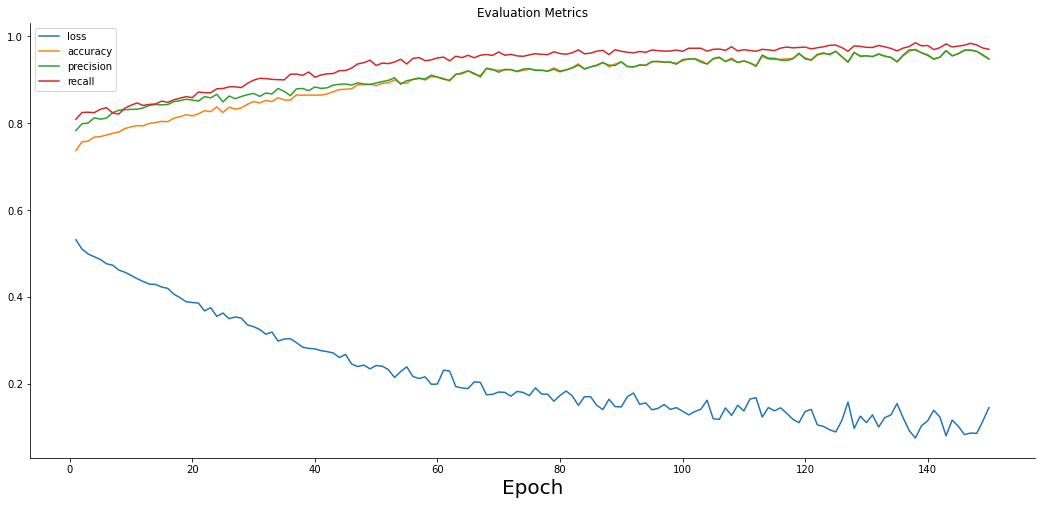

In [42]:
plt.plot(np.arange(1,EPOCHS+1), history.history['loss'], label='loss')
plt.plot(np.arange(1,EPOCHS+1), history.history['accuracy'], label='accuracy')
plt.plot(np.arange(1,EPOCHS+1), history.history['precision'], label='precision')
plt.plot(np.arange(1,EPOCHS+1), history.history['recall'], label='recall')
plt.title('Evaluation Metrics')
plt.xlabel('Epoch', size =20)
plt.legend()

In [43]:
predictions = model.predict(X_test_scaled)

41/41 [==============================] - 0s 534us/step


In [44]:
predictions

array([[1.2558947e-04],
       [9.8290890e-01],
       [3.1555578e-01],
       ...,
       [9.2385256e-01],
       [9.9887425e-01],
       [3.6841375e-01]], dtype=float32)

In [45]:
prediction_classes =[1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

In [46]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[337 145]
 [153 658]]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes): .2f}')
print(f'Precision: {accuracy_score(y_test, prediction_classes): .2f}')
print(f'Recall: {accuracy_score(y_test, prediction_classes): .2f}')

Accuracy:  0.77
Precision:  0.77
Recall:  0.77
